In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

In [3]:
x = np.linspace(-2,2,)
y = x**2+5

In [4]:
def blur_plot(ax, xystart=(-0.5, -0.35)):
    xstart, ystart = xystart
    from matplotlib.patches import Rectangle 
    ar = Rectangle(xy=(xstart,ystart), width=1.01-xstart, height=1-(2*ystart), 
                   transform=ax.transAxes,
                   facecolor="white", alpha=0.75, linewidth=0, 
                  clip_on=False, zorder=99)
    ax.add_patch(ar)


In [5]:
def example_plot(plot_kws = {}, blurred=True):
    f, ax = plt.subplots(figsize=(2,2), dpi=150, layout='tight')
    ax.plot(x, y, **plot_kws)
    ax.set_title('axes title')
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    if blurred: blur_plot(ax)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return f, ax 

## xycoords accepts an Artist object

C:\Users\TK\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
C:\Users\TK\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


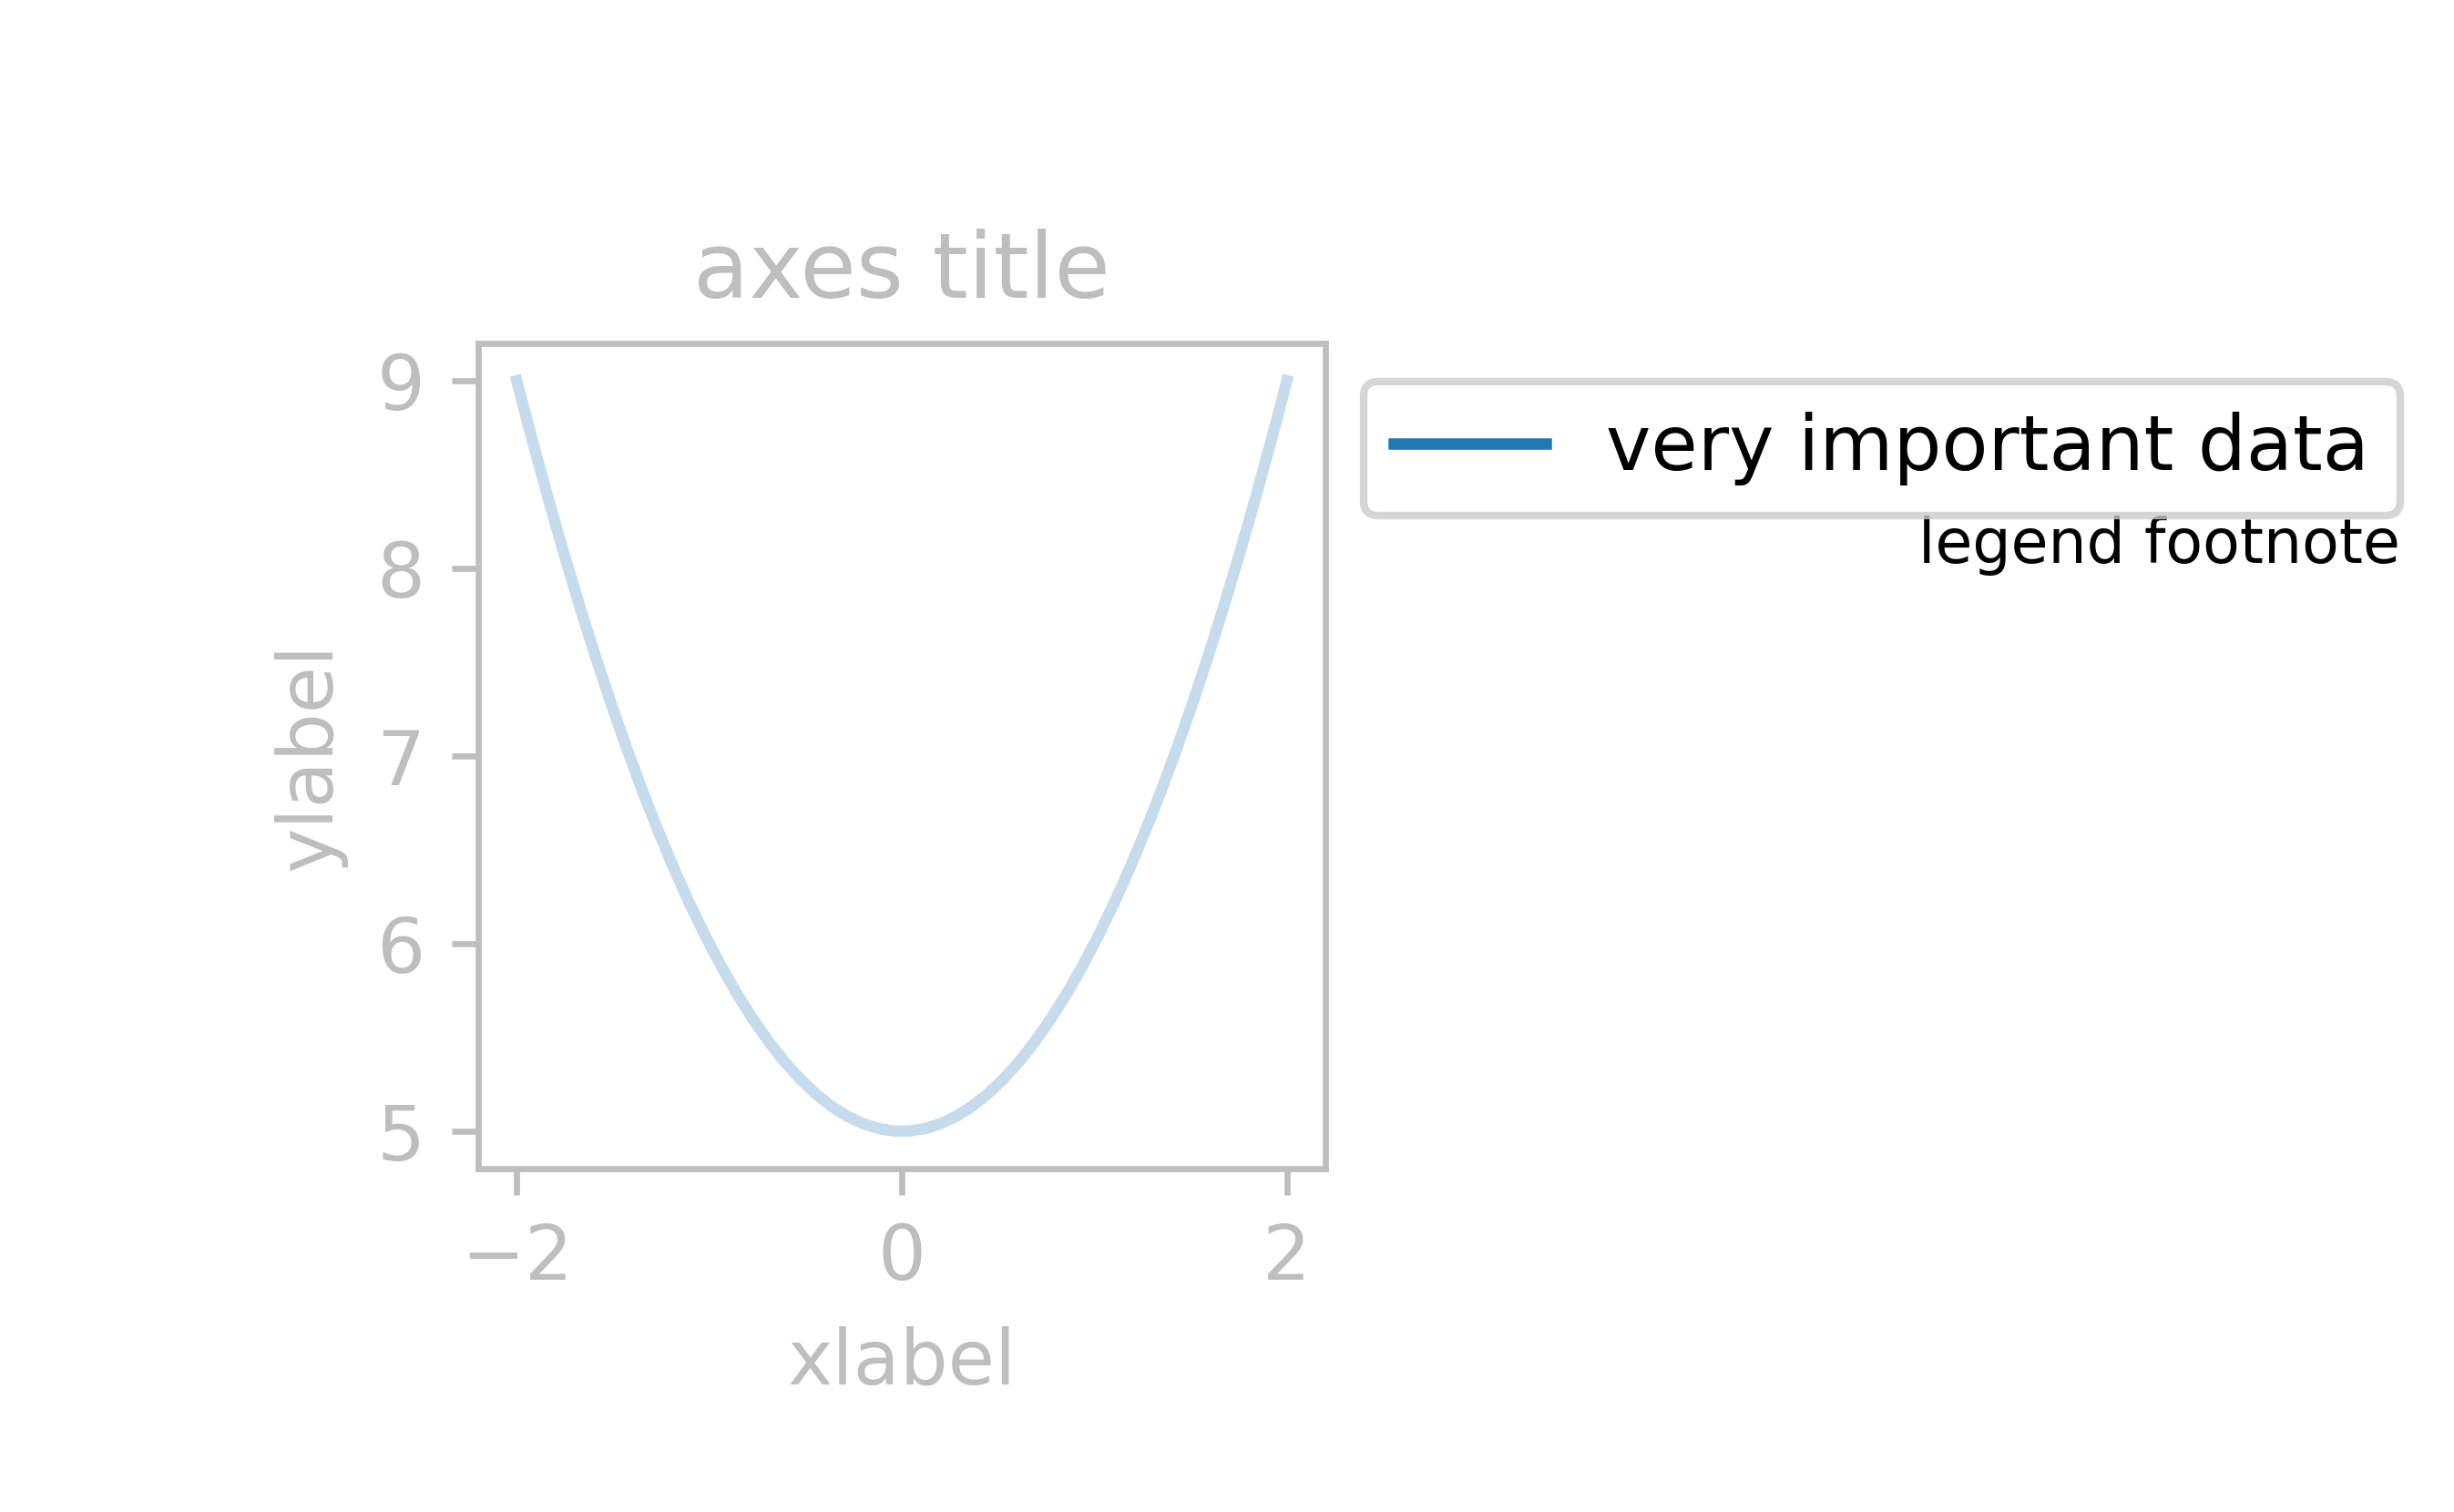

In [236]:
#| echo: true
#| code-line-numbers: "2,5"
#| fig-align: center

f, ax = example_plot({'label': 'very important data'})
legend_object = ax.legend(bbox_to_anchor=[1,1])
legend_footnote = ax.annotate(
    text='legend footnote', fontsize=8,
    xy=[1,0], xycoords=legend_object, va='top', ha='right'
    )

## coordinate systems {.smaller .nostretch}


:::: {.columns}

::: {.column width="47%"}


Plot in relative coords: 

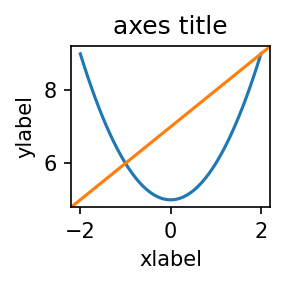

In [255]:
#| echo: true
#| code-line-numbers: "2"
#| fig-align: center

f, ax = example_plot(blurred=False)
ax.plot([0, 1], [0, 1], transform=ax.transAxes)

Transformations into data coordinates also possible!

:::

::: {.column width="53%"}

Position relative to Artist:

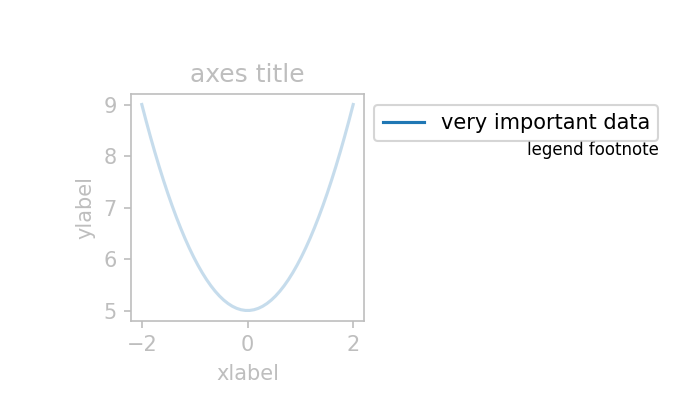

In [258]:
#| echo: true
#| code-line-numbers: "2,5,6"
#| fig-align: center

f, ax = example_plot({'label': 'very important data'})
legend_object = ax.legend(bbox_to_anchor=[1,1])
legend_footnote = ax.annotate(
    text='legend footnote', fontsize=8,
    xy=[1,0], xycoords=legend_object, 
    va='top', ha='right'
    )

:::

::::

## Use loops

In [117]:
import seaborn as sns
data = sns.load_dataset('penguins')

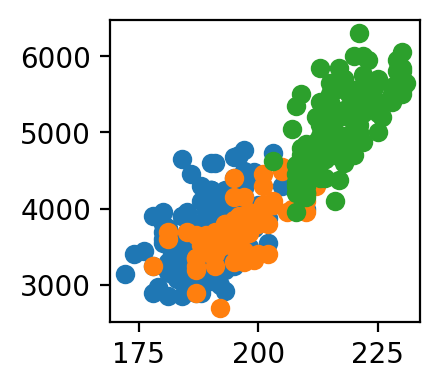

In [131]:
#| echo: true
#| code-line-numbers: "2-4"
#| fig-align: center

f, ax = plt.subplots(figsize=(2,2), dpi=200)
for chosen in data['species'].unique():
    tmp_data = data.query('species == @chosen')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'])

## Use dictionaries {.smaller}

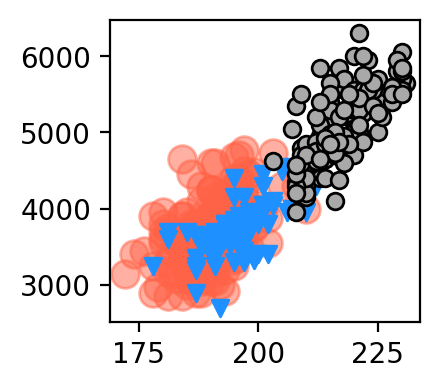

In [133]:
#| echo: true
#| code-line-numbers: "1-5,11"
#| fig-align: center
#| code-overflow: scroll

species_styles = {
    'Adelie': {'color': 'tomato', 's': 100, 'alpha': 0.5}, 
    'Chinstrap': {'color': 'dodgerblue', 'marker': 'v'}, 
    'Gentoo': {'color': 'darkgray', 'edgecolor':'black'}
}

f, ax = plt.subplots(figsize=(2,2), dpi=200)
for chosen in data['species'].unique():
    tmp_data = data.query('species == @chosen')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], 
               **species_styles[chosen])

## Use zip and zip_longest {.smaller}

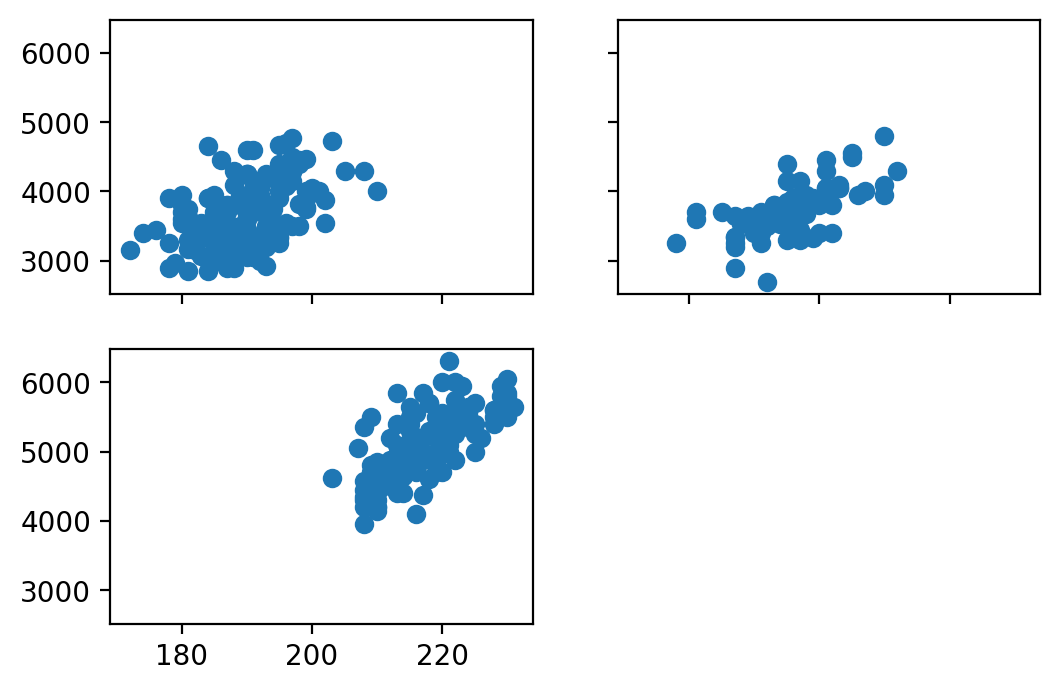

In [174]:
#| echo: true
#| code-line-numbers: "1,3,7,8,11,12"
#| fig-align: center

from itertools import zip_longest

f, axes = plt.subplots(ncols=2, nrows=2, 
                       sharex=True, sharey=True, 
                      figsize=(6,4), dpi=200)

for chosen, ax in zip_longest(data['species'].unique(), axes.ravel()): 
    if chosen is not None:
        tmp_data = data.query('species == @chosen')
        ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'])
    else: 
        ax.remove()


## Use dictionaries (again) {.smaller}

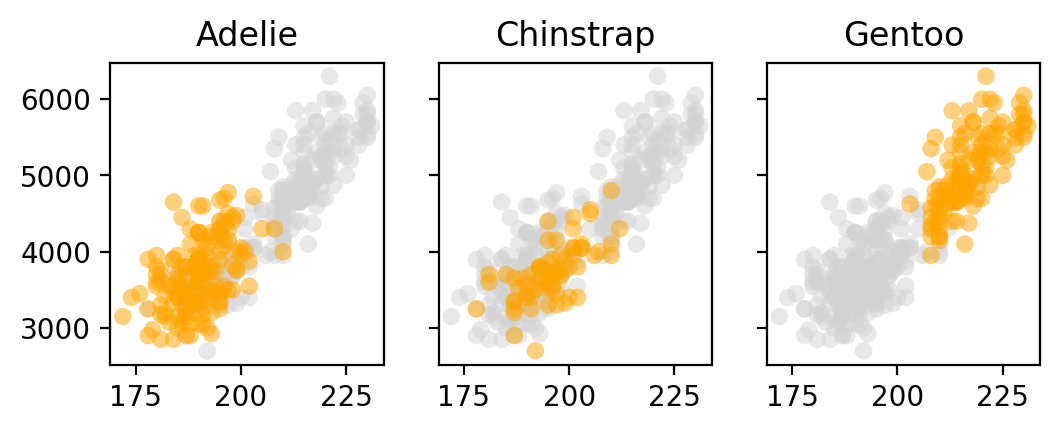

In [172]:
#| echo: true
#| code-line-numbers: "3-5,10-13"
#| fig-align: center

f, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(6,2), dpi=200)

selected = {'color': 'orange'}
background = {'color': 'lightgray'}
shared_style = {'alpha': 0.5, 's': 40, 'edgecolors': 'none'}

for chosen, ax in zip(data['species'].unique(), axes.ravel()): 
    tmp_data = data.query('species == @chosen')
    bg_data = data.query('species != @chosen')
    ax.scatter(x=bg_data['flipper_length_mm'], y=bg_data['body_mass_g'],
              **background, **shared_style)        
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], 
              **selected, **shared_style)
    ax.set_title(chosen)


## Use dictionaries (again 2) {.smaller}

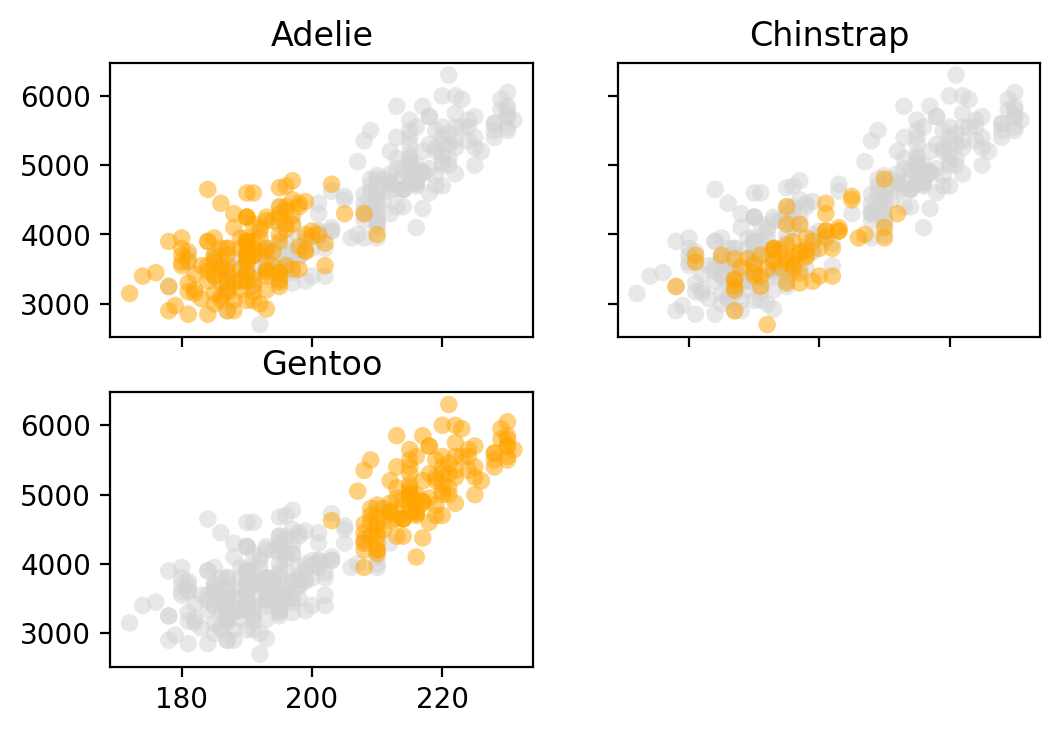

In [177]:
#| echo: true
#| code-line-numbers: "3-5,11-12"
#| fig-align: center

f, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(6,4), dpi=200)

selected = {'color': 'orange'}
background = {'color': 'lightgray'}
shared_style = {'alpha': 0.5, 's': 40, 'edgecolors': 'none'}

for chosen, ax in zip_longest(data['species'].unique(), axes.ravel()): 
    if chosen is not None:
        tmp_data = data.query('species == @chosen')
        bg_data = data.query('species != @chosen')
        ax.scatter(x=bg_data['flipper_length_mm'], y=bg_data['body_mass_g'], **background, **shared_style)        
        ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **selected, **shared_style)
        ax.set_title(chosen)
    else: 
        ax.remove()

## Use functions and kwargs {.smaller}

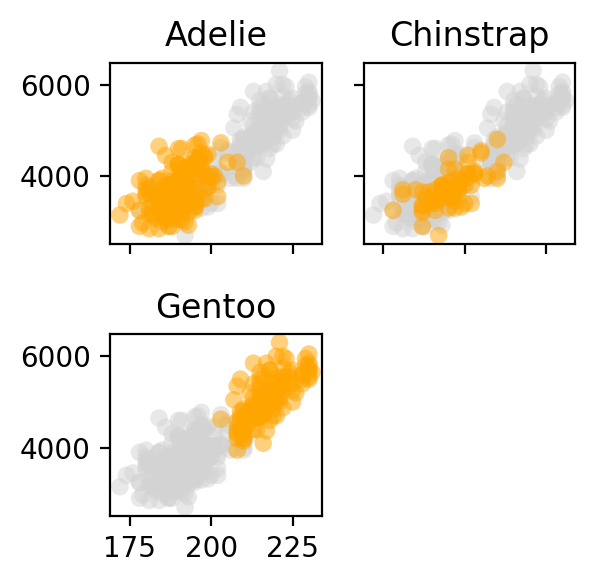

In [192]:
#| echo: true
#| code-line-numbers: "1,7,8,11,14,19-21"
#| fig-align: center

def plot_single(data, chosen, ax, selected={}, background={}, plot_kws={}):
    tmp_data, bg_data = data.query('species == @chosen'), data.query('species != @chosen')
    ax.scatter(x=bg_data['flipper_length_mm'], y=bg_data['body_mass_g'], **background, **plot_kws)        
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **selected, **plot_kws)
    ax.set_title(chosen)

def dashboard(data, selected, background, dashboard_kws={}, plot_kws={}):
    f, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, dpi=200, **dashboard_kws)
    for chosen, ax in zip_longest(data['species'].unique(), axes.ravel()): 
        if chosen is not None:
            plot_single(data=data, chosen=chosen, ax=ax, selected=selected, background=background, plot_kws=plot_kws)
        else: 
            ax.remove()
    return f, axes        

selected = {'color': 'orange'}
background = {'color': 'lightgray'}
shared_style = {'alpha': 0.5, 's': 40, 'edgecolors': 'none'}
f, axes = dashboard(data, selected=selected, background=background, 
                  dashboard_kws={'figsize': (3,3), 'gridspec_kw': {'hspace': 0.5}}, 
                  plot_kws=shared_style) 


## plt.{...} tries to infer the last active component {.smaller}

If `np.mean()` was built the same way as the `plt.plot()` interface: 

In [ ]:
#| echo: true
#| execute: false
#| output-location: column


x = [1, 2, 3, 4]
y = [10, 11, 12, 13]
np.mean() 

11.5

In [ ]:
#| echo: true
#| execute: false
#| output-location: column


y = [10, 11, 12, 13]
x = [1, 2, 3, 4]
np.mean() 

2.5

## plt.{...} is evil {.smaller}

In [ ]:
f, axes = plt.subplots(ncols=2)
ax1, ax2 = axes

ax1.set_title('ax1')
ax2.set_title('ax2')

plt.plot(x,y)

In [224]:
#| echo: true
#| output-location: column

x = np.array([1, 2, 3, 4])
y = np.array([10, 11, 12, 13])

plotted in ax1
plotted in ax2


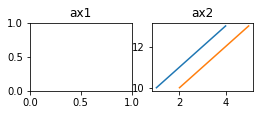

In [231]:
#| echo: true
#| output-location: column
#| code-line-numbers: "5,6"

f, axes = plt.subplots(ncols=2, figsize=(4,1.25))
axes[0].set_title('ax1')
axes[1].set_title('ax2')

for i,ax in enumerate(axes):
    plt.plot(x+i,y)
    print('plotted in {}'.format(ax.get_title()))

&nbsp;

plotted in ax1
plotted in ax2


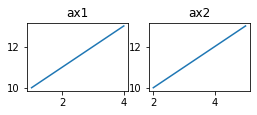

In [232]:
#| echo: true
#| output-location: column
#| code-line-numbers: "5,6"

f, axes = plt.subplots(ncols=2, figsize=(4,1.25))
axes[0].set_title('ax1')
axes[1].set_title('ax2')

for i,ax in enumerate(axes):
    ax.plot(x+i,y)
    print('plotted in {}'.format(ax.get_title()))

## plt.{...} is evil {.smaller .nostretch}

In [ ]:
f, axes = plt.subplots(ncols=2)
ax1, ax2 = axes

ax1.set_title('ax1')
ax2.set_title('ax2')

plt.plot(x,y)

In [224]:
#| echo: true
#| output-location: column

x = np.array([1, 2, 3, 4])
y = np.array([10, 11, 12, 13])

PLT-API only sees the last subplot:

plotted in ax1
plotted in ax2


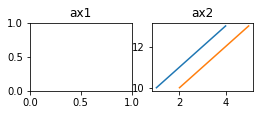

In [231]:
#| echo: true
#| output-location: column
#| code-line-numbers: "5,6"

f, axes = plt.subplots(ncols=2, figsize=(4,1.25))
axes[0].set_title('ax1')
axes[1].set_title('ax2')

for i,ax in enumerate(axes):
    plt.plot(x+i,y)
    print('plotted in {}'.format(ax.get_title()))

OO-API allows for precise control:

plotted in ax1
plotted in ax2


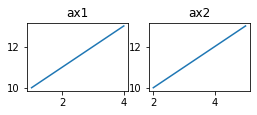

In [232]:
#| echo: true
#| output-location: column
#| code-line-numbers: "5,6"

f, axes = plt.subplots(ncols=2, figsize=(4,1.25))
axes[0].set_title('ax1')
axes[1].set_title('ax2')

for i,ax in enumerate(axes):
    ax.plot(x+i,y)
    print('plotted in {}'.format(ax.get_title()))

## Use stylesheets {.smaller .nostretch}

In [25]:
#| echo: false

import matplotlib as mpl

In [28]:
def example_plot(plot_kws = {}, blurred=False):
    f, ax = plt.subplots(figsize=(2.25,2.25), dpi=120, layout='tight')
    ax.plot(x, y, **plot_kws)
    ax.set_title('axes title')
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    if blurred: blur_plot(ax)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return f, ax 

:::: {.columns}

::: {.column width="66%"}

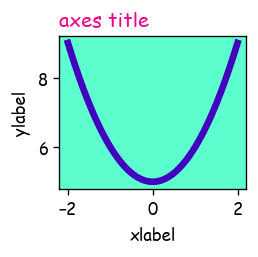

In [48]:
#| echo: true
#| fig-align: center
#| code-line-numbers: "2-8"


from cycler import cycler
with mpl.rc_context({'lines.linewidth': 4, 
                     'axes.prop_cycle': cycler('color', ['#4200bf']),
                     'axes.facecolor': '#5effcf', 
                     'axes.titlelocation': 'left', 
                     'axes.titlecolor': '#ef028c',
                     'font.family': 'Comic Sans MS'}):
    example_plot()

:::

::::

## Use stylesheets {.smaller .nostretch}

:::: {.columns}

::: {.column width="50%"}

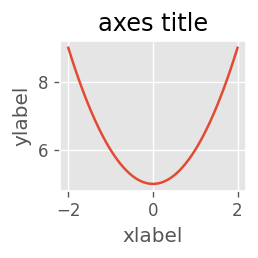

In [30]:
#| echo: true
#| fig-align: center

with mpl.style.context('ggplot'):
    example_plot()

:::

::: {.column width="50%"}

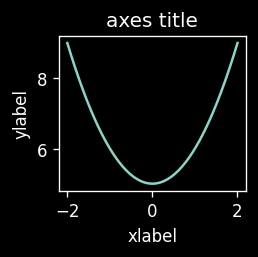

In [31]:
#| echo: true
#| fig-align: center

with mpl.style.context('dark_background'):
    example_plot()

:::

::::